In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

Checking chessboard 15x5...


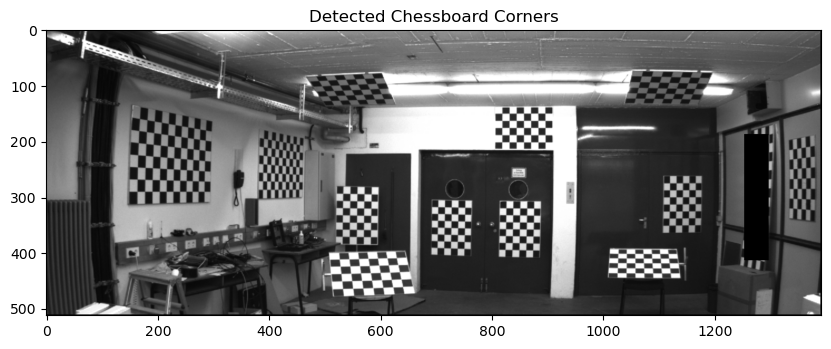

Checking chessboard 5x7...


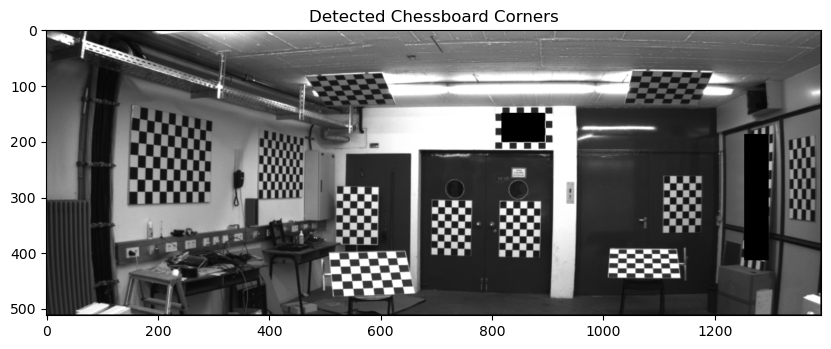

Checking chessboard 7x5...


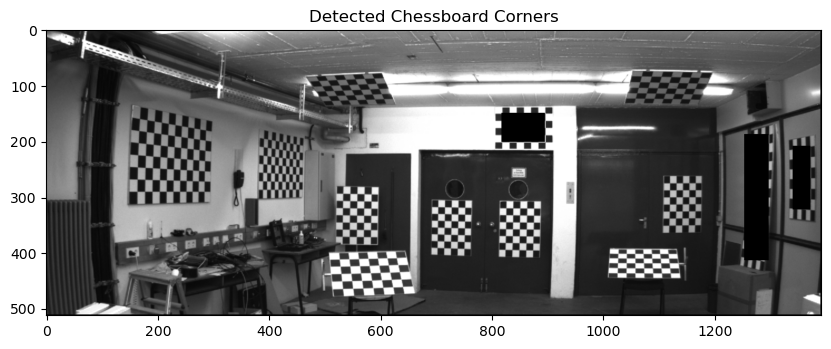

Checking chessboard 5x7...


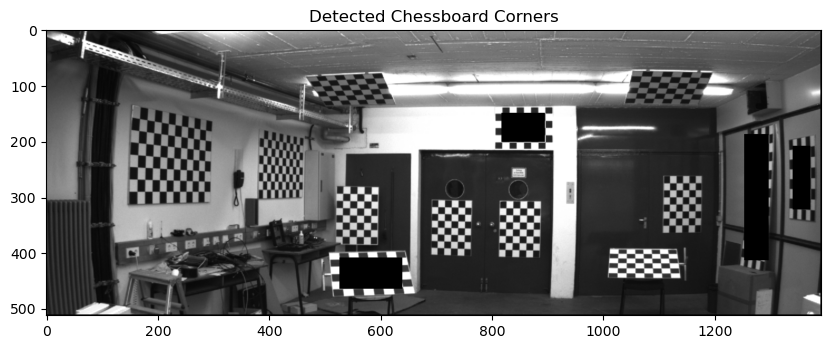

Checking chessboard 7x5...


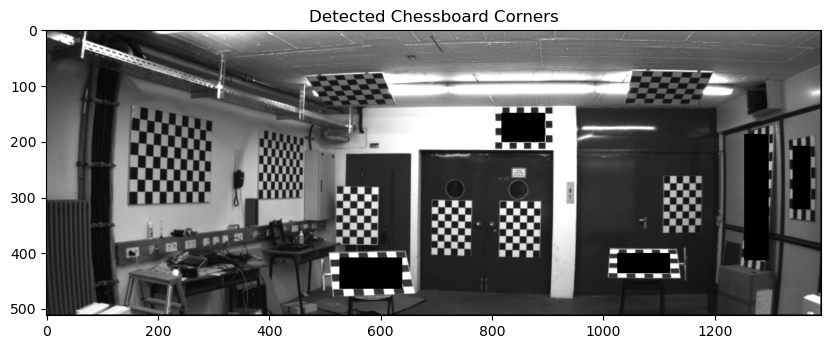

Checking chessboard 5x7...


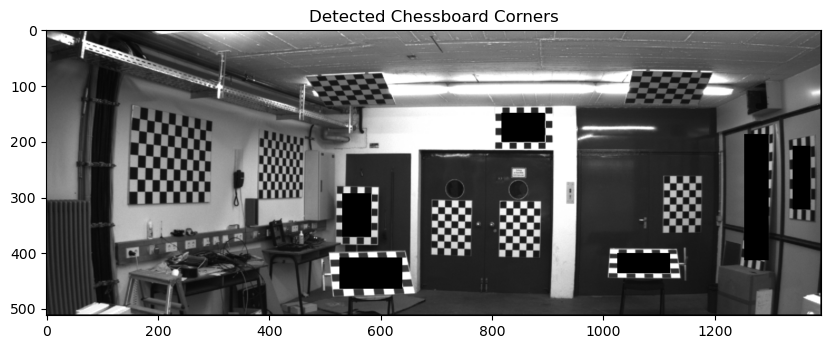

Checking chessboard 7x5...


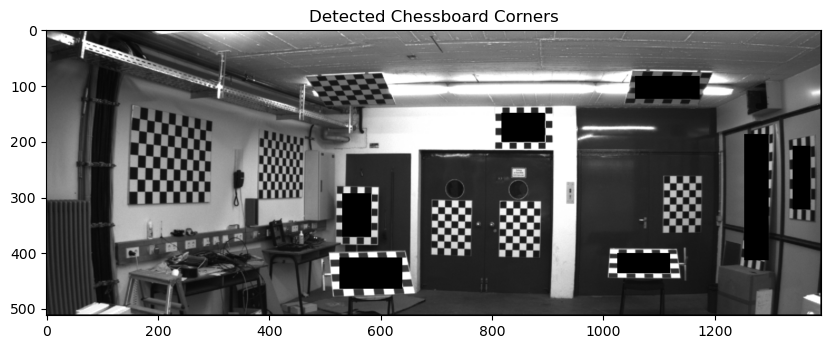

Checking chessboard 4x4...


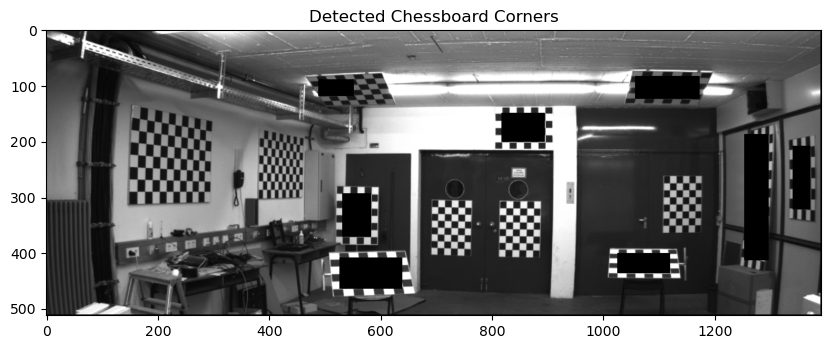

Checking chessboard 5x7...


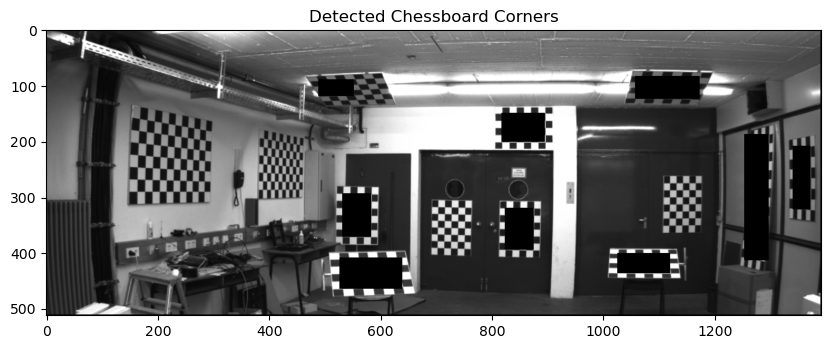

In [14]:
# Load the image (replace with the path to your uploaded image)
image_path = '../34759_final_project_rect/calib/image_02/data/'
# List of chessboards with their respective number of internal corners (vertical, horizontal)
chessboards = [
    (15,5),
    (5,7),
    (7,5),
    (5,7),
    (7,5),
    (5,7),
    (7,5),
    (7,7),
    (4,4),
    (4,4),
    (4,4)
]

found_areas = []
objpoints = []  # 3D points in real-world space
imgpoints = []  # 2D points in image plane

for image in os.listdir(image_path):
    img = cv2.imread(image_path + image)
    # Check if the image was successfully loaded
    if img is None:
        print('Error: Unable to load image')
        continue

    # Convert to grayscale for corner detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    for i in found_areas:
        x_min, y_min, x_max, y_max = i
        gray[y_min:y_max, x_min:x_max] = 0


    # Loop through each chessboard's configuration (different number of internal corners)
    for nb_vertical, nb_horizontal in chessboards:
        # Prepare object points for this specific chessboard (3D points in real-world space)
        objp = np.zeros((nb_horizontal * nb_vertical, 3), np.float32)
        objp[:, :2] = np.mgrid[0:nb_vertical, 0:nb_horizontal].T.reshape(-1, 2)

        # Detect chessboard corners for this chessboard size
        ret, corners = cv2.findChessboardCorners(
                gray, (nb_vertical, nb_horizontal),
                flags=cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE
            )


        if ret: 
            print(f'Checking chessboard {nb_vertical}x{nb_horizontal}...')
            objpoints.append(objp)  # 3D points
            imgpoints.append(corners)  # 2D points

            # Create a bounding box around the detected corners
            x_min, y_min = np.int32(corners.min(axis=0).ravel())
            x_max, y_max = np.int32(corners.max(axis=0).ravel())

            found_areas.append((x_min, y_min, x_max, y_max))

            # Set all values inside the bounding box to 0
            gray[y_min:y_max, x_min:x_max] = 0



            plt.figure(figsize=(10, 10))
            plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
            #for corners in imgpoints:
            #    if corners is not None:
            #        plt.plot(corners[:, 0, 0], corners[:, 0, 1], 'ro', markersize=5)
            plt.title('Detected Chessboard Corners')
            plt.show()

   

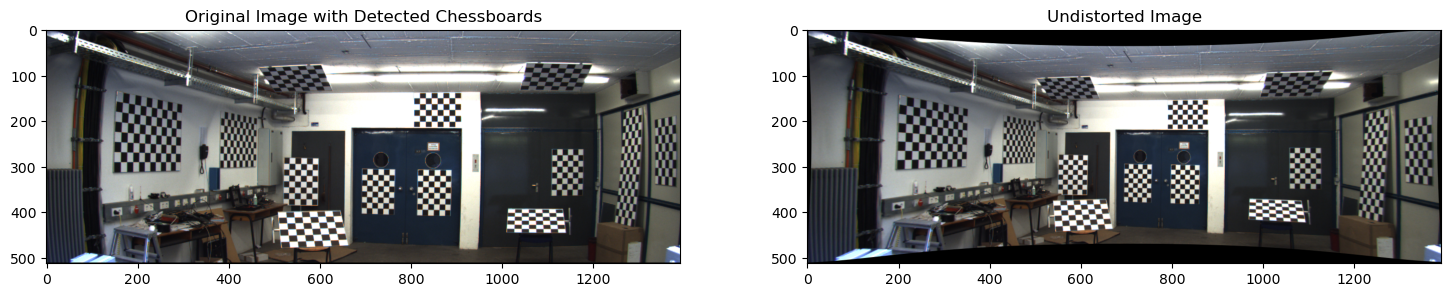

In [15]:
# Perform camera calibration using all the detected chessboards
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Get the optimal camera matrix
h, w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))

# Undistort the original image
undistorted_img = cv2.undistort(img, mtx, dist, None, newcameramtx)

# Display the original and undistorted images
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 18))
ax[0].imshow(img[..., [2, 1, 0]])  # Convert BGR to RGB for matplotlib
ax[0].set_title('Original Image with Detected Chessboards')
ax[1].imshow(undistorted_img[..., [2, 1, 0]])  # Convert BGR to RGB for matplotlib
ax[1].set_title('Undistorted Image')

plt.show()